# Фильтрация изображений в частотной области

## Линейные фильтры
**Линейная система** - это такая система, для которой отклик на сумму входных сигналов равен сумме откликов на эти сигналы по отдельности (принцип суперпозиции). Примером может являться **линейный фильтр**, при использовании которого к входному сигналу применяется некоторый линейный оператор; предназначен фильтр для выделения или подавления некоторого сигнала или нужной части спектра.

При линейной фильтрации изображения каждый выходной пиксель равен взвешенной сумме пикселей в пределах некоторой области исходной картинки. Иными словами, мы вычисляем **дискретную свертку**:

$$g(x, y)= f(x, y) * h(x, y) = \sum_{m=-a}^{m=a}\sum_{n=-b}^{n=b}f(m, n)h(x-m, y-n)= \sum_{m=-a}^{m=a}\sum_{n=-b}^{n=b}f(x-m, y-n)h(m, n).$$

Здесь $f(x,y)$, $g(x,y)$ - исходное и выходное изображения, $h(x, y)$ называют **ядром фильтра**, $a=\frac{M-1}{2}$, $b=\frac{N-1}{2}$, $M$, $N$ - размерности ядра.

**Теорема о свертке** утверждает, что свертка двух функций (например, изображений) в пространственной области и произведение их Фурье-образов образуют Фурье-пару:
$$
f(x, y) * h(x, y) \Leftrightarrow \mathcal{F}\{{f(x, y)}\} \mathcal{F}\{{h(x, y)}\}.
$$
Здесь двойная стрелка означает, что выражение в левой части получается обратным Фурье-преобразованием выражения в правой части.

Фильтрацию изображений можно производить как в пространственной, так и в частотной области. В этом задании вы познакомитесь с особенностями **фильтрации в частотной области**.

## Фильтр нижних частот

- На изображении визуально виден периодический шум. Используя функцию `np.fft.fft2()` отобразите двумерный спектр картинки. Спектр должен быть центрирован, т.е. нулевая частота должна находиться в центре спектра.

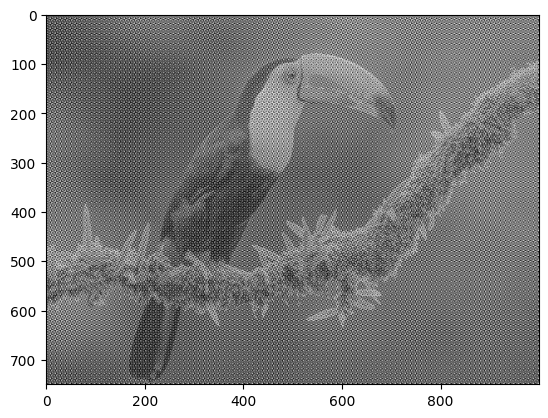

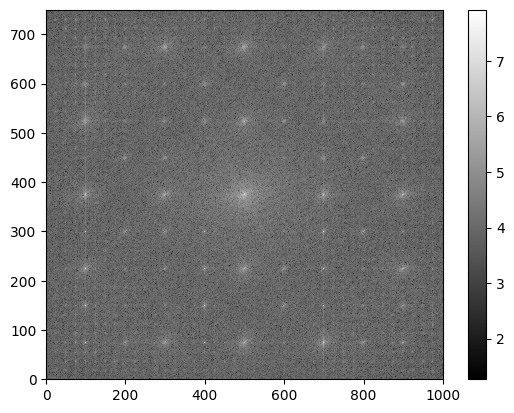

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

img = np.array(Image.open('.\\data\\toucan_noise.jpg').convert('L'))
# img = np.array(Image.open('.\\data\\europa_blur.jpg').convert('L'))
plt.imshow(img, cmap='gray')

fig = plt.figure()
ax = plt.subplot()
# YOUR CODE HERE
img_fft = np.fft.fft2(img)
img_shift = np.fft.fftshift(img_fft)
plt.pcolor(np.log10(np.abs(img_shift)),cmap='grey')
plt.colorbar()

- Чтобы избежать так называемой ошибки перехлеста, которая возникает из-за периодичности дискретного преобразования Фурье (подробности см. Гонсалес, п. 4.6.6), перед фильтрацией необходимо дополнить изображение нулями.

    Реализуйте функцию `get_expand_img()`, возвращающую изображение, дополненное нулями. Его новый размер положим равным $P=2M$ и $Q=2N$. Центрировать изображение необязательно.

(750, 1000)
(1500, 2000)


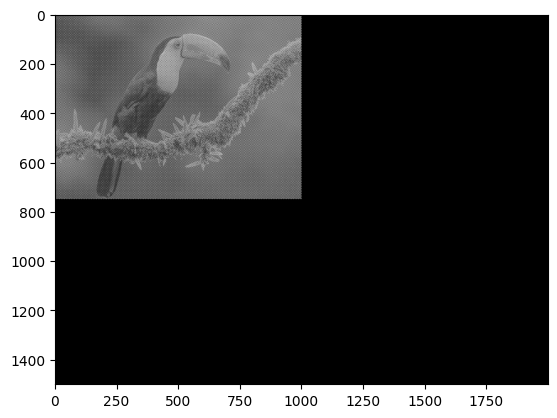

In [2]:
# Отобразите получившееся после использования функции изображение

# YOUR CODE HERE
import importlib
import filtering_funcs as ff
importlib.reload(ff)

zeroes_img = ff.get_expand_img(img)

print(img.shape)
print(zeroes_img.shape)

plt.imshow(zeroes_img,cmap='gray')

- Для фильтрации существует множество разных фильтров. В этом задании нам потребуется *гауссовское ядро*. В одномерном случае оно задается формулой:
    $$h_{gauss}(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-x^2/2\sigma^2}.$$
    В двумерном случае справедлива формула:
    $$h_{gauss}(x, y) = h_{gauss}(x)h_{gauss}(y)$$

    Реализуйте функцию `gauss_kernel()`. На вход: размер ядра и среднеквадратическое отклонение $\sigma$. Возвращает функция гауссово ядро. Размер ядра фильтра должен быть равен $P \times Q$.

In [3]:
# Выведите ядро фильтра любого размера в качестве примера

# YOUR CODE HERE
importlib.reload(ff)
kern = ff.gauss_kernel(kern_size=zeroes_img.shape,sigma=1.0)
print("Gauss kernel: ", kern)

Сумма ядра 1.000000010701152
Gauss kernel:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


- Наконец, вычислите Фурье-образы изображения и ядра фильтра, перемножьте их в частотной области и с помощью обратного преобразования Фурье получите обработанное изображение. Из-за использования расширения на предыдущем шаге необходимо будет вырезать нужную область, содержащую изображение. 

    Осуществите все эти шаги в функции `get_filtered_image()`, которая принимает на вход расширенные изображение и пространственный фильтр и возвращает отфильтрованное изображение. На картинке не должно остаться исходного шума.

Сумма ядра 2.5
Размер исходного изображения (размер ядра // 2)(750, 1000)
Размер отфильрованного необрезанного изображения (1500, 2000)
Размер отфильрованного обрезанного изображения (750, 1000)


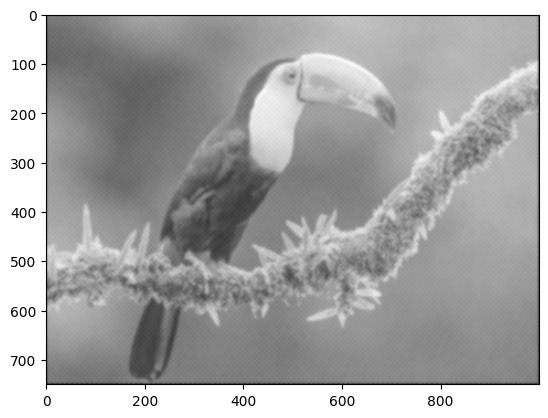

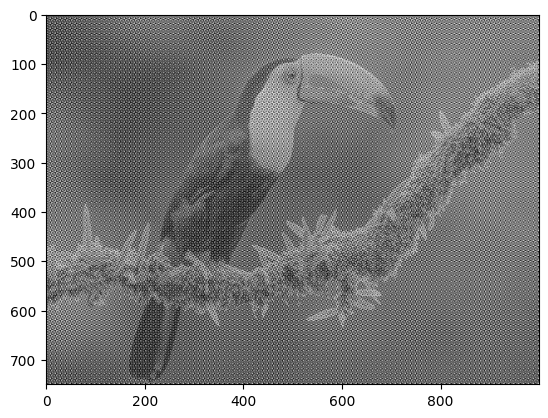

In [4]:
# Отобразите изображение после фильтрации

# YOUR CODE HERE
importlib.reload(ff)
# img = np.random.randint(0,256,(17,14))
z = ff.get_expand_img(img) 
k = ff.gauss_kernel(z.shape,2.5)
res= ff.get_filtered_image(z,k)
plt.imshow(res, cmap='gray')
plt.figure()
plt.imshow(img, cmap='gray')

## Фильтр верхних частот. Повышение резкости изображения.

В этой части задания необходимо воспользоваться фильтром верхних частот (ФВЧ) для повышения резкости изображения Европы, спутника Юпитера.

Источник: https://europa.nasa.gov/resources/29/europas-stunning-surface/

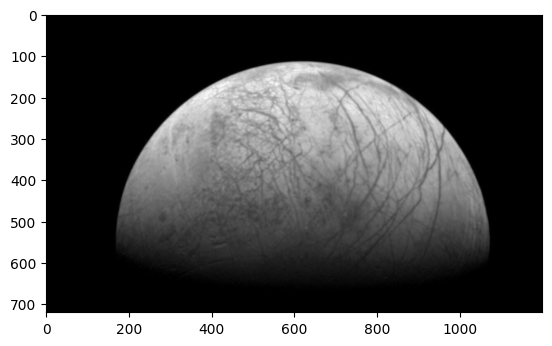

In [5]:
# Загрузите и отобразите картинку
img_path = '.\\data\\europa_blur.jpg'

# YOUR CODE HERE
img = np.array(Image.open(img_path).convert('L'))
plt.imshow(img,cmap='gray')

- В качестве ФВЧ будем использовать **фильтр Баттерворта**. Его передаточная функция в частотной области имеет вид:
$$
H(k_x, k_y) = \frac{1}{1+ [D_0/D(k_x, k_y)]^{2n}},
$$
где $n$ - порядок фильтра, $D_0$ - частота среза, $D(k_x, k_y) = \left[(k_x-\frac{P}{2})^2 + (k_y-\frac{Q}{2})^2\right]^{1/2}   $ - расстояние от начала координат в частотной области до точки $(k_x, k_y)$.

Функция `high_pass_kernel()` должная принимать размер фильтра, значение частоты среза и порядок.


In [6]:
# Выведите ядро фильтра любого размера в качестве примера

# YOUR CODE HERE
importlib.reload(ff)
hp_kern = ff.high_pass_kernel(img.shape,2,2)
print("Butterworth kernel: ",  hp_kern)

Butterworth kernel:  [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


- Процесс фильтрации абсолютно такой же, как и в случае использования ФНЧ: дополните изображение нулями, сформируйте цифровой фильтр, перемножьте фурье образы и получите отфильтрованное изображение.

*Обратите внимание*: фильтр Баттерворта сразу задан в частотной области, поэтому будьте внимательны с правильным центрированием фильтра и изображения

Можете дополнить уже написанные функции или произвести расчеты в ячейке ниже. Подберите параметры фильтра так, чтобы стало лучше видно трещины на поверхности спутника.

Text(0.5, 1.0, 'Порядок = 0.5')

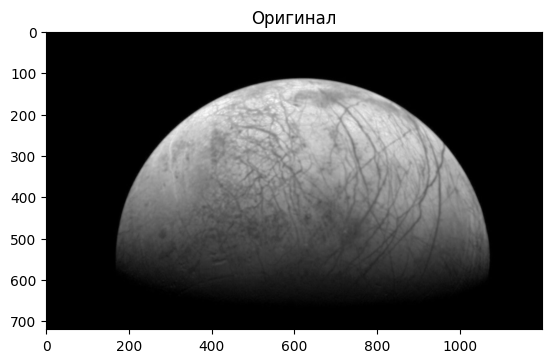

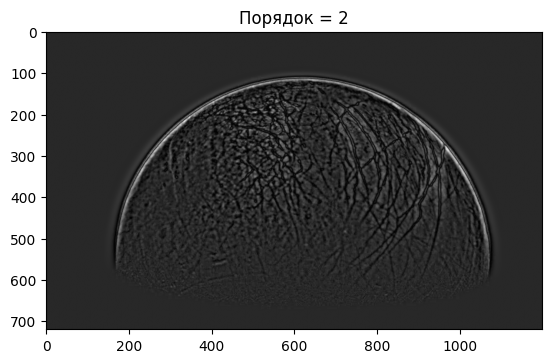

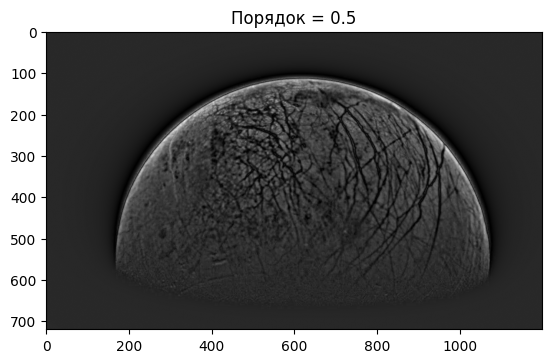

In [7]:
# YOUR CODE HERE
# исходник
def filt(img_z,kern):
    img_fft = np.fft.fft2(img_z)
    img_shift = np.fft.fftshift(img_fft)
    filtered = kern*img_shift
    img_filtered = np.fft.ifftshift(filtered)
    return np.fft.ifft2(img_filtered)
importlib.reload(ff)
img_path = '.\\data\\europa_blur.jpg'
img = np.array(Image.open(img_path).convert('L'))

plt.imshow(img,cmap='gray')
plt.title('Оригинал')

p,q = img.shape
img_z = ff.get_expand_img(img)
cutoff = min(img_z.shape) * 0.05

kern = ff.high_pass_kernel(img_z.shape,cutoff=cutoff,order=2)
img_res = filt(img_z,kern)[:p,:q]
plt.figure()
plt.imshow(np.abs(img_res),cmap='gray')
plt.title('Порядок = 2')

kern = ff.high_pass_kernel(img_z.shape,cutoff=cutoff,order=0.5)
img_res = filt(img_z,kern)[:p,:q]
plt.figure()
plt.imshow(np.abs(img_res),cmap='gray')
plt.title('Порядок = 0.5')

## Нелинейные фильтры

Линейные фильтры хорошо работают не для всех моделей шума. Рассмотрим *импульсный шум*, который встречается, например, при работе электронных утройств и связан с дискретной природой заряженных частиц. В контексте изображений он проявляет себя как наличие случайно разбросанных пикселей с очень большим значением.

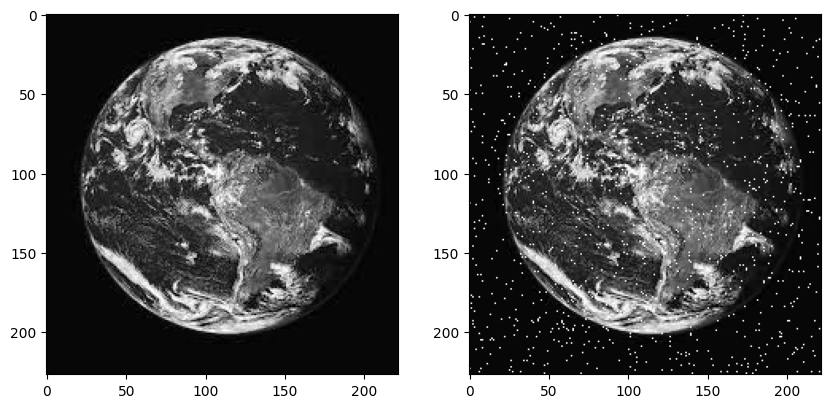

In [8]:
# Пример дробового шума на изображении
import IPython
IPython.display.Image('.\\data\\impulse_noise_example.png', width=700)

- Реализуйте функцию `get_img_with_impulse_noise()`, которая принимает на вход изображение и параметр `ratio`, отвечающий за долю пикселей, которые должны принять большое значение. Возвращает функция зашумленную картинку.

    Присвойте $5\%$ пикселей значение, соответствующее белому цвету в grayscale режиме, затем отобразите картинку.

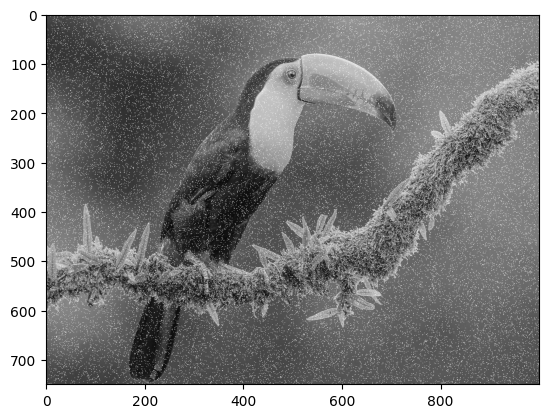

In [9]:
img = np.array(Image.open('.\\data\\toucan.jpeg'))
plt.imshow(img, cmap='gray')

# YOUR CODE HERE
importlib.reload(ff) 
img_s = ff.get_img_with_impulse_noise(img,0.05)
plt.imshow(img_s, cmap='gray')

Теперь у нас есть картинка с импульсным шумом. Чтобы от него избавиться, воспользуемся **медианным фильтром** - это нелинейный фильтр, в котором каждый выходной пиксель получается вычислением медианы по всем соседям соответствующего входного пикселя (в случае окна $3\times 3$).

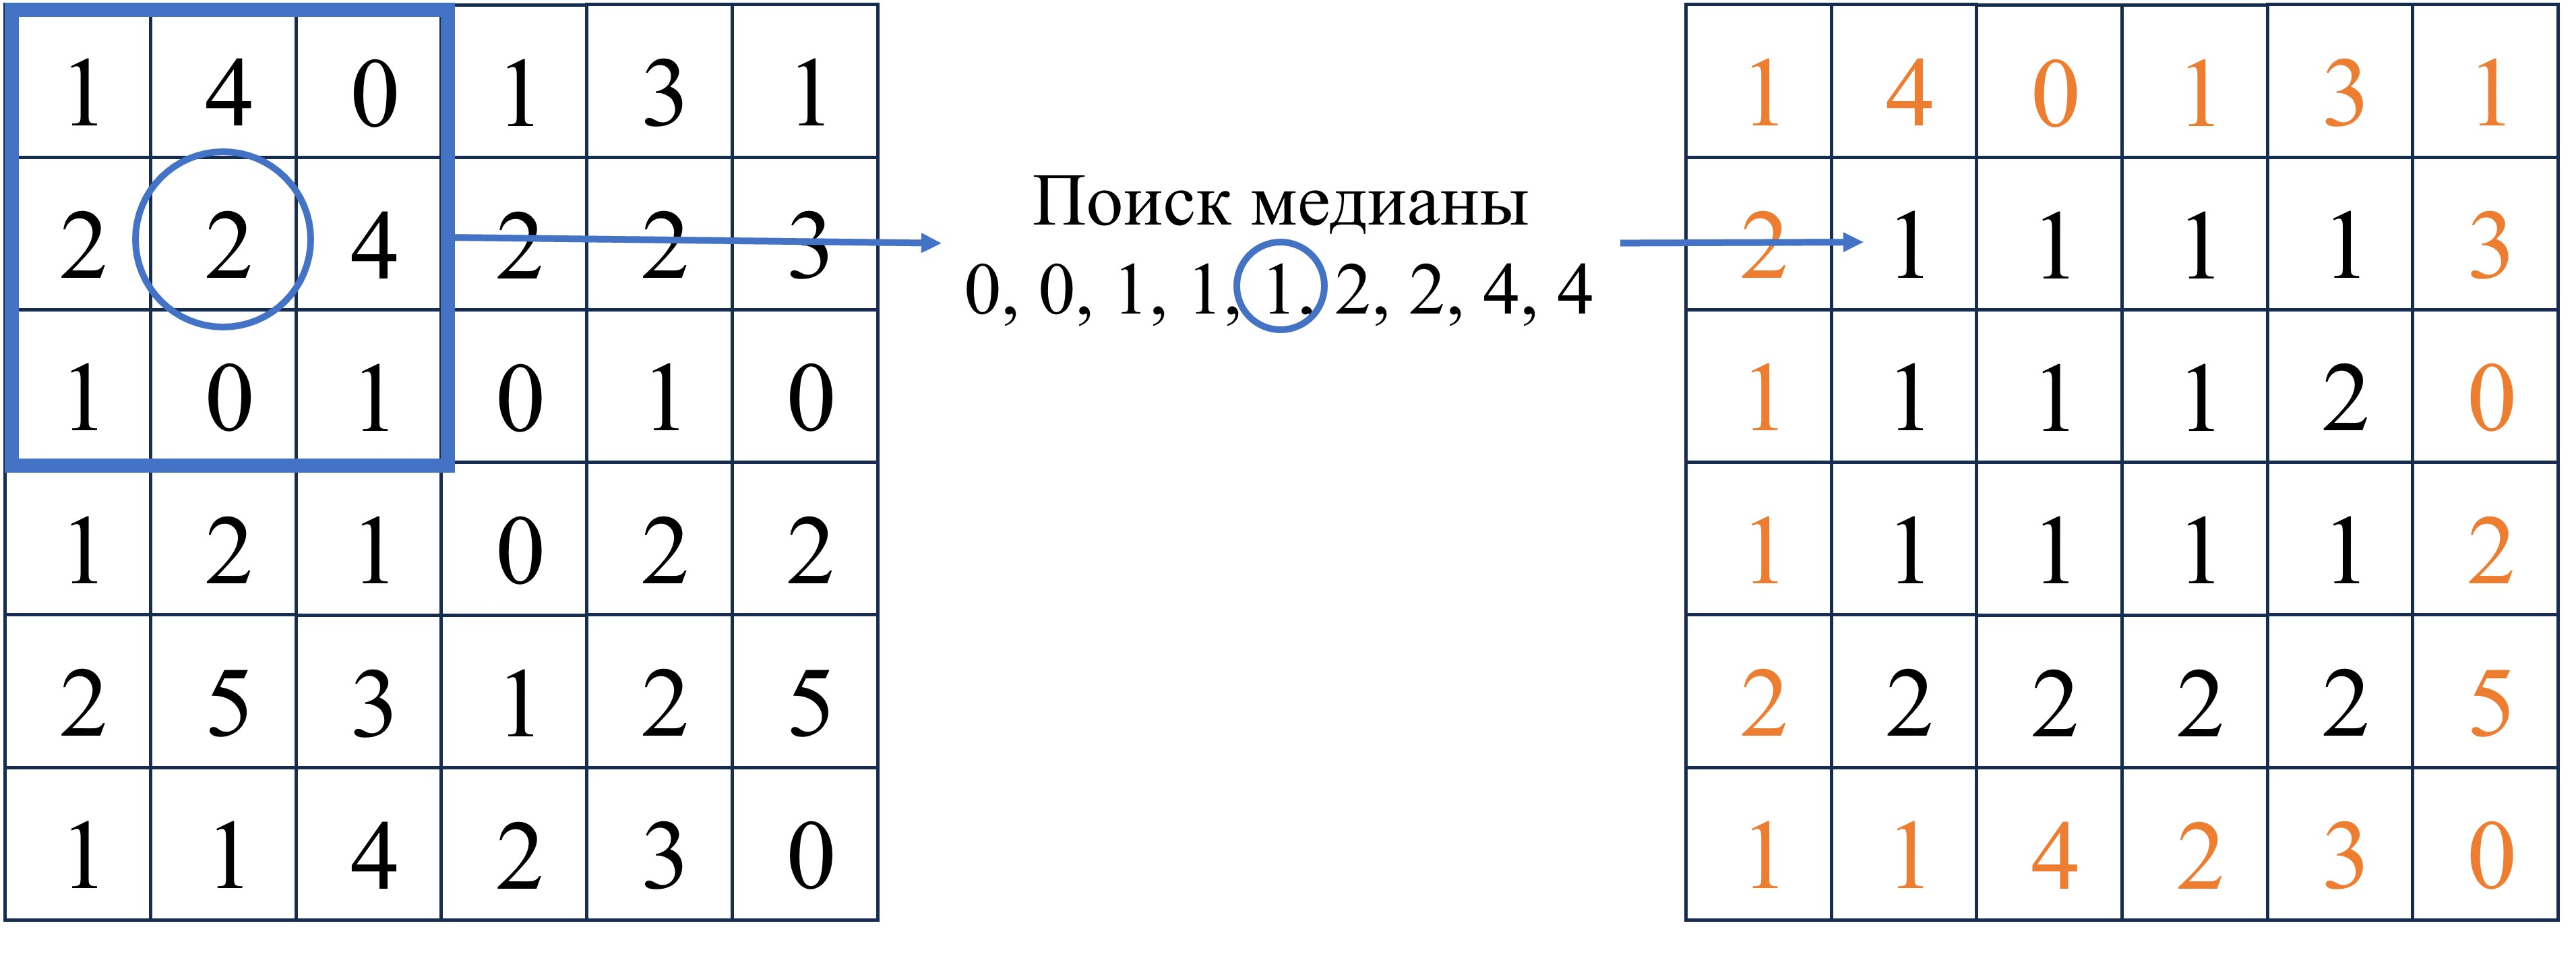

In [10]:
# Медианный фильтр 3x3 с сохранением граничных значений
IPython.display.Image('data/median_filter.jpg', width=900)

- Реализуйте функцию `median_filter()`, принимающую на вход картинку и размер окна для нахождения медианы. Отфильруйте изображение с помощью окна $3\times 3$. Значения на границе оставьте неизменными.

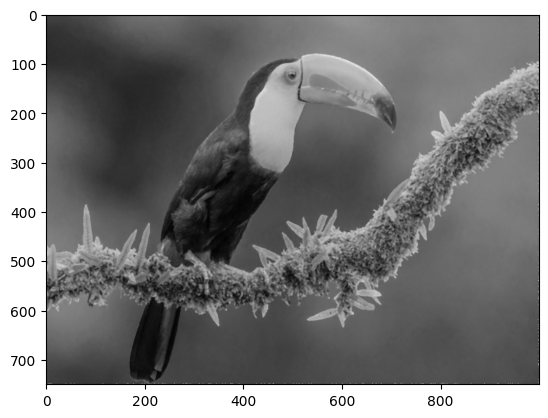

In [11]:
# YOUR CODE HERE
importlib.reload(ff)

kern_size = (4, 4) # 3*3 слабо убирает
img_flt = ff.median_filter(img_s,kern_size)
plt.imshow(img_flt,cmap='gray')


## **Перед отправкой сохраните файлы в следующем формате: 01_Фамилия.ipynb и filtering_funcs.py**